<a href="https://colab.research.google.com/github/noranehab15/projects/blob/main/Wind_Turbine_Predictive_Maintenance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score ,f1_score ,confusion_matrix

In [2]:
df=pd.read_csv("/content/wind_turbine_maintenance_data.csv")

In [3]:
df

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347,0
1,1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235,0
2,1,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403,0
3,1,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683,0
4,1,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021,1
...,...,...,...,...,...,...,...,...,...,...
35035,2,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873,0
35036,2,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664,0
35037,2,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800,0
35038,2,15.166837,8.430216,1325.573380,66.105359,65.192135,2.000636,10.735241,46.782986,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Turbine_ID                35040 non-null  int64  
 1   Rotor_Speed_RPM           35040 non-null  float64
 2   Wind_Speed_mps            35040 non-null  float64
 3   Power_Output_kW           35040 non-null  float64
 4   Gearbox_Oil_Temp_C        35040 non-null  float64
 5   Generator_Bearing_Temp_C  35040 non-null  float64
 6   Vibration_Level_mmps      35040 non-null  float64
 7   Ambient_Temp_C            35040 non-null  float64
 8   Humidity_pct              35040 non-null  float64
 9   Maintenance_Label         35040 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.7 MB


In [5]:
df.describe()

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,1.500000,14.998813,7.991100,1500.087340,65.007705,75.014411,2.001254,10.011707,59.945455,0.247317
std,0.500007,0.996711,1.000523,100.308440,4.987860,4.985797,0.198647,5.033105,9.991139,0.591441
min,1.000000,11.139053,3.801420,1096.556628,44.676878,52.685157,1.194998,-12.021070,15.434405,0.000000
25%,1.000000,14.324117,7.322801,1431.894808,61.662044,71.634222,1.867094,6.618438,53.198579,0.000000
50%,1.500000,14.995670,7.992324,1500.080064,64.991915,75.034723,2.000812,9.981060,59.945151,0.000000
75%,2.000000,15.670454,8.658140,1568.095394,68.353356,78.401443,2.136039,13.411453,66.668883,0.000000
max,2.000000,19.616726,11.824991,1914.789505,86.096832,96.494288,2.842975,34.007573,105.255483,2.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

,0
Turbine_ID,0
Rotor_Speed_RPM,0
Wind_Speed_mps,0
Power_Output_kW,0
Gearbox_Oil_Temp_C,0
Generator_Bearing_Temp_C,0
Vibration_Level_mmps,0
Ambient_Temp_C,0
Humidity_pct,0
Maintenance_Label,0


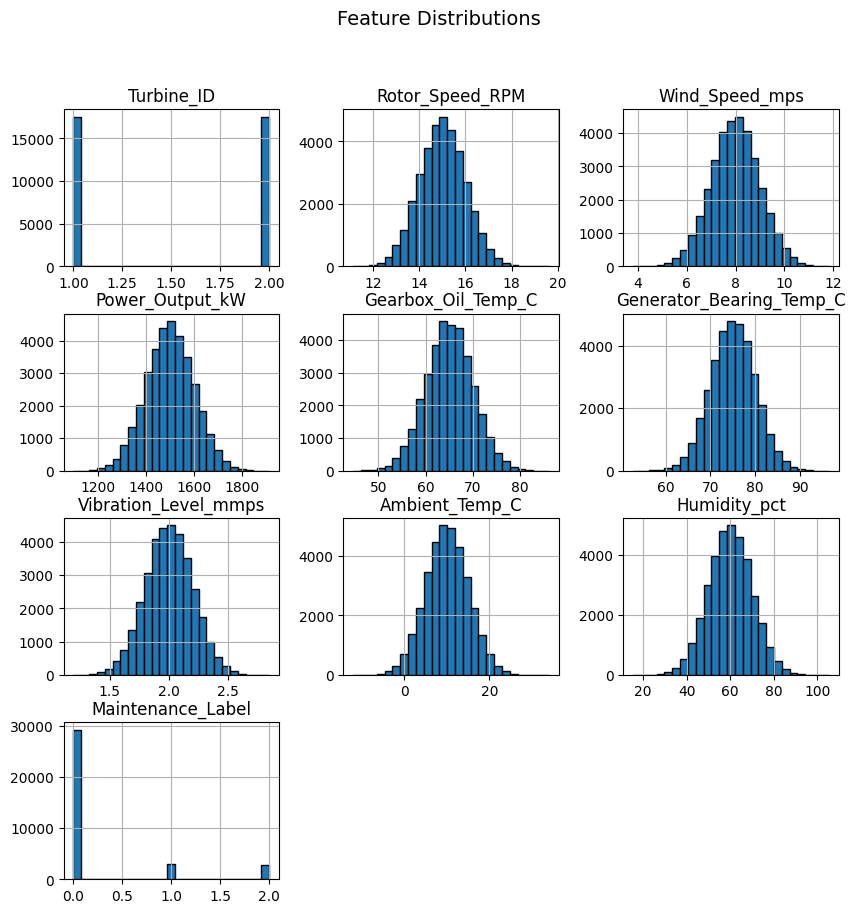

In [8]:
df.hist(figsize=(10, 10), bins=25, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

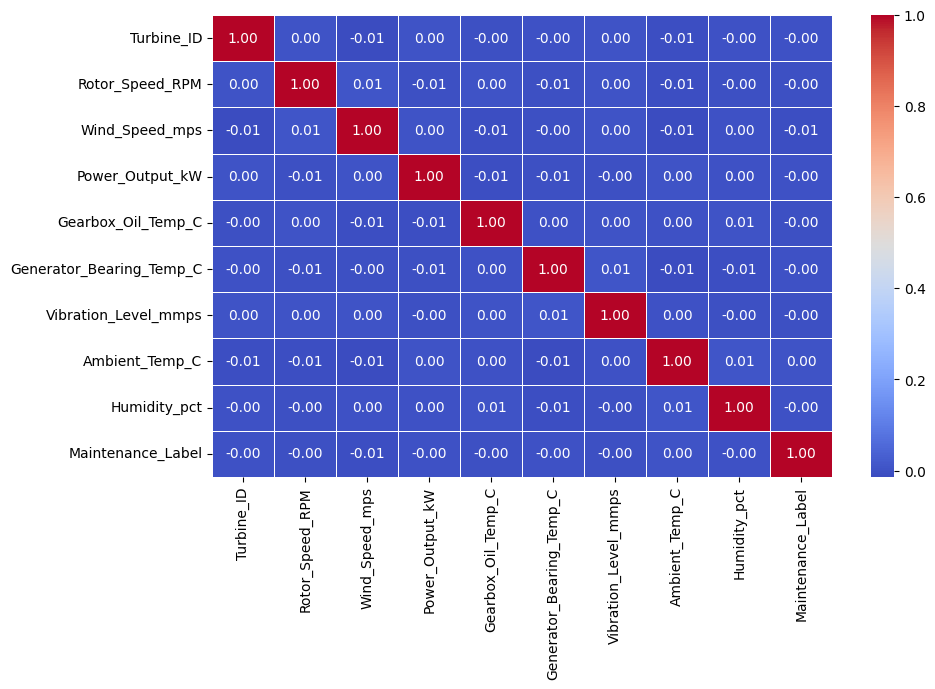

In [9]:
df=df.select_dtypes("number")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [10]:
df.drop(columns=["Turbine_ID","Ambient_Temp_C","Humidity_pct"],inplace=True)

In [11]:
df

,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Maintenance_Label
0,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,0
1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,0
2,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,0
3,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,0
4,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,1
...,...,...,...,...,...,...,...
35035,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,0
35036,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,0
35037,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,0
35038,15.166837,8.430216,1325.573380,66.105359,65.192135,2.000636,0


In [12]:
df['Maintenance_Label'] = df['Maintenance_Label'].astype('category')

In [13]:
X= df.drop(columns=["Maintenance_Label"])
y= df["Maintenance_Label"]
X_test = df.drop(columns=["Maintenance_Label"], errors='ignore')

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
for col in X_train.select_dtypes(include=["object"]).columns:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col])
    if col in X_test.columns:
        X_test[col] = encoder.transform(X_test[col])

In [16]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_train_pred = rfc.predict(X_train_scaled)

In [20]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f" Random Forest Training Accuracy: {train_accuracy:.4f}")

 Random Forest Training Accuracy: 1.0000


In [21]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [22]:
pd.Series(y_pred_test).value_counts(normalize=True)

,proportion
0,1.0


In [23]:
y_test_pred = rfc.predict(X_test_scaled)

In [24]:
predictions_df = pd.DataFrame({'Predictions': y_test_pred}, index=X_test.index)

df = df.merge(predictions_df, how='left', left_index=True, right_index=True)
df.to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv
